# 1. Estrategia para elegir entre dos conjuntos de parámetros

##i:


Para este ejercicio emplearé el código de la tarea 4:

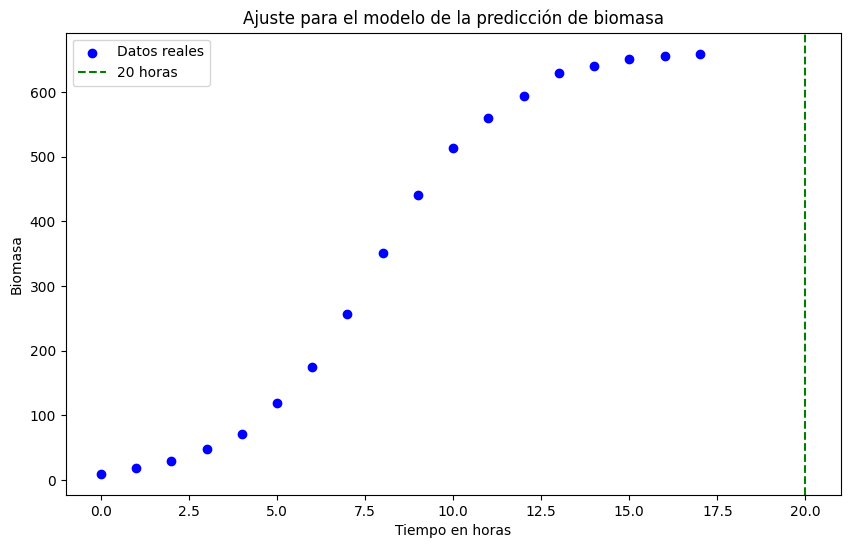

Parámetros ajustados:
P0 = 9.10, k = 0.5476, S = 662.66
Predicción de biomasa a las 20 horas: 661.82 g


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tiempo = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
biomasa = np.array([9.6, 18.3, 29.0, 47.2, 71.1, 119.1, 174.6, 257.3, 350.7, 441.0, 513.3, 559.7, 594.8, 629.4, 640.8, 651.1, 655.9, 659.6])

def funcion_logistica(t, P0, k, s):
    return s / (1 + (s/P0 - 1) * np.exp(-k *t))

parametros, _ = curve_fit(funcion_logistica, tiempo, biomasa, p0=[9.6, 0.5, 660])

tiempo_prediccion = np.linspace(0, 20, 100)
biomasa_prediccion = funcion_logistica(tiempo_prediccion, *parametros)

plt.figure(figsize=(10,6))
plt.scatter(tiempo, biomasa, color = 'blue', label = 'Datos reales')
plt.axvline(x = 20, color = 'green', linestyle = '--', label = '20 horas')
plt.xlabel('Tiempo en horas')
plt.ylabel('Biomasa')
plt.title('Ajuste para el modelo de la predicción de biomasa')
plt.legend()
plt.show()

P0_nuevo, k_nuevo, s_nuevo = parametros
print(f"Parámetros ajustados:\nP0 = {P0_nuevo:.2f}, k = {k_nuevo:.4f}, S = {s_nuevo:.2f}")

biomasa_20_hrs = funcion_logistica(20, *parametros)
print(f"Predicción de biomasa a las 20 horas: {biomasa_20_hrs:.2f} g")

Ahora lo edito para poder adaptarlo al problema que se plantea.

MSE para el primer conjunto de parámetros: 10.6799
MSE para el segundo conjunto de parámetros: 10.6799


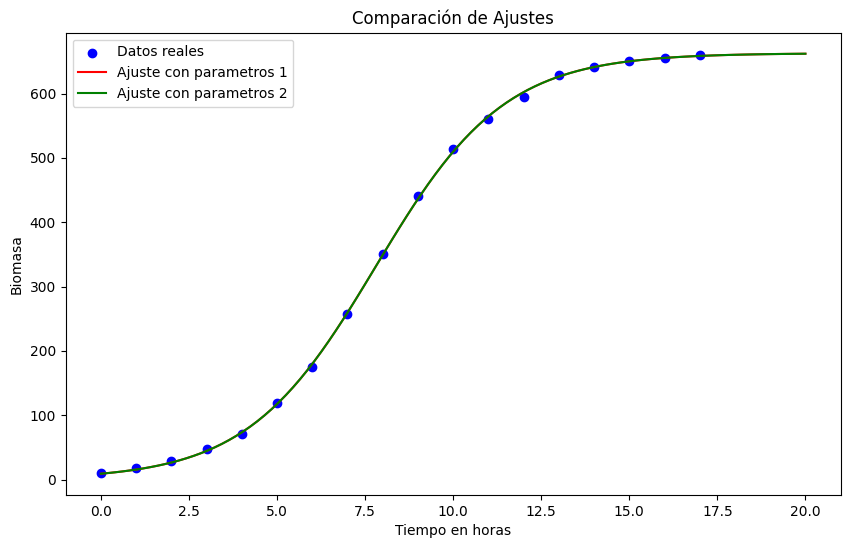

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

tiempo = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
biomasa = np.array([9.6, 18.3, 29.0, 47.2, 71.1, 119.1, 174.6, 257.3, 350.7, 441.0, 513.3, 559.7, 594.8, 629.4, 640.8, 651.1, 655.9, 659.6])
def funcion_logistica(t, P0, k, s):
    return s / (1 + (s/P0 - 1) * np.exp(-k *t)) #Definí la función logísitca

# Conjunto de parámetros 1
parametros1, _ = curve_fit(funcion_logistica, tiempo, biomasa, p0=[9.6, 0.5, 660])
biomasa_predicha1 = funcion_logistica(tiempo, *parametros1)
mse1 = mean_squared_error(biomasa, biomasa_predicha1)

# Conjunto de parámetros 2
parametros2, _ = curve_fit(funcion_logistica, tiempo, biomasa, p0=[10, 0.4, 670]) #Aquí ajusté el modelo con dos diferentes parámetros iniciales.
biomasa_predicha2 = funcion_logistica(tiempo, *parametros2)
mse2 = mean_squared_error(biomasa, biomasa_predicha2)

print(f"MSE para el primer conjunto de parámetros: {mse1:.4f}")
print(f"MSE para el segundo conjunto de parámetros: {mse2:.4f}") #Imprimí el MSE de cada uno.

tiempo_prediccion = np.linspace(0, 20, 100)
biomasa_prediccion1 = funcion_logistica(tiempo_prediccion, *parametros1)
biomasa_prediccion2 = funcion_logistica(tiempo_prediccion, *parametros2)

plt.figure(figsize=(10,6))
plt.scatter(tiempo, biomasa, color='blue', label='Datos reales')
plt.plot(tiempo_prediccion, biomasa_prediccion1, color='red', label='Ajuste con parametros 1')
plt.plot(tiempo_prediccion, biomasa_prediccion2, color='green', label='Ajuste con parametros 2')
plt.xlabel('Tiempo en horas')
plt.ylabel('Biomasa')
plt.title('Comparación de Ajustes')
plt.legend()
plt.show()



En conclusión, ajusté el modelo con dos conjuntos diferentes de parámetro iniciales.

Calculé el error cuadrático medio para cada conjunto. El MSE indicó qué tan cerca estába el modelo ajustado de los datos reales, el conjunto con el MSE más bajo se ajustó mejor.

## ii:


In [4]:
parametros_iniciales = [
    [9.6, 0.3, 660],
    [9.6, 0.5, 650],
    [10, 0.4, 670],
    [8.5, 0.45, 665]
]

resultados = []
for p0 in parametros_iniciales:
    parametros, _ = curve_fit(funcion_logistica, tiempo, biomasa, p0=p0)
    biomasa_predicha = funcion_logistica(tiempo, *parametros)
    mse = mean_squared_error(biomasa, biomasa_predicha)
    resultados.append((p0, mse, parametros))
    print(f"Parámetros iniciales: {p0}, MSE: {mse:.4f}")

Parámetros iniciales: [9.6, 0.3, 660], MSE: 10.6799
Parámetros iniciales: [9.6, 0.5, 650], MSE: 10.6799
Parámetros iniciales: [10, 0.4, 670], MSE: 10.6799
Parámetros iniciales: [8.5, 0.45, 665], MSE: 10.6799


El objetivo aquí, es explorar diferentes combinaciones del parámetro inicial de la biomasa y su tasa de crecimiento, De tal forma que se pueda ir ajustando el modelo logístico a los datos de la biomasa.

Aquí definí los conjuntos de parámetros iniciales, ajusté el modelo logístico para cada conjunto de parámetros, calculé el error del MSE de cada ajuste.


###iii:

Mejor conjunto de parámetros: [9.6, 0.5, 650]
Con el menor MSE: 10.6799


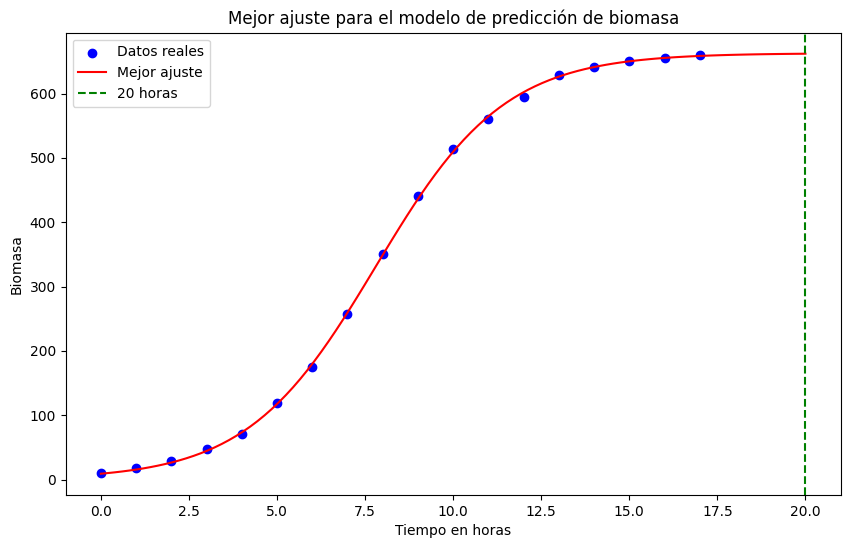

In [5]:
# Encontrar el conjunto con el menor MSE
mejor_ajuste = min(resultados, key=lambda x: x[1])
mejor_parametros_iniciales, mejor_mse, mejor_parametros = mejor_ajuste

print(f"Mejor conjunto de parámetros: {mejor_parametros_iniciales}")
print(f"Con el menor MSE: {mejor_mse:.4f}")

tiempo_prediccion = np.linspace(0, 20, 100)
biomasa_prediccion = funcion_logistica(tiempo_prediccion, *mejor_parametros)

plt.figure(figsize=(10,6))
plt.scatter(tiempo, biomasa, color='blue', label='Datos reales')
plt.plot(tiempo_prediccion, biomasa_prediccion, color='red', label='Mejor ajuste')
plt.axvline(x=20, color='green', linestyle='--', label='20 horas')
plt.xlabel('Tiempo en horas')
plt.ylabel('Biomasa')
plt.title('Mejor ajuste para el modelo de predicción de biomasa')
plt.legend()
plt.show()


Revisé los resultados de todos los ajustes: Después de calcular el MSE para cada conjunto de parámetros, seleccioné el conjunto con el MSE más bajo, ya que este representaba el mejor ajuste a los datos.
Justifiqué la elección: Expliqué que mi elección se basaba en que ese conjunto minimizaba el error, lo que significaba que el modelo predecía mejor los valores reales.
Visualicé el mejor ajuste: Grafiqué el mejor ajuste junto con los datos observados para mostrar cómo el modelo predecía el crecimiento de la biomasa.

# 2.

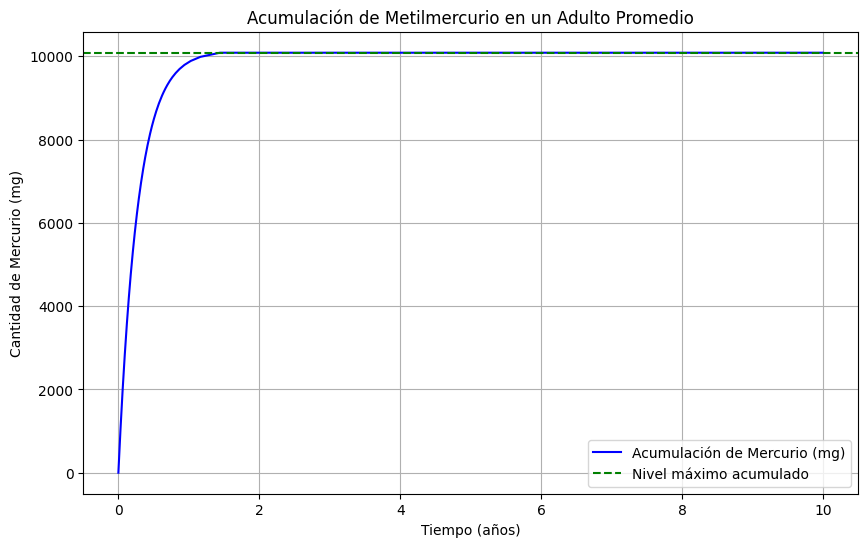

Cantidad máxima de mercurio acumulado: 10086.00 mg
El número máximo de pescados por mes que una persona puede comer sin exceder el límite letal es: 3 pescados


In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Parámetros del problema
peso_adulto = 70  # kg
peso_pescado = 0.817  # kg
mercurio_por_gramo = 0.43  # microgramos por gramo
vida_media = 70  # días (media de los rangos 65-75)
consumo_por_semana = 2  # veces por semana

# Convertir microgramos por gramo a miligramos por kg (1 g = 1000 mg)
mercurio_por_kg_pescado = mercurio_por_gramo * 1000  # µg a mg

# Cantidad de mercurio consumido por pescado (en miligramos)
mercurio_por_pescado = mercurio_por_kg_pescado * peso_pescado  # mg por pescado

# Tasa de eliminación de mercurio
tasa_eliminacion = 0.5 ** (1 / vida_media)  # Fracción de mercurio eliminada por día

# Ecuación en diferencias para la acumulación de mercurio
def acumulacion_mercurio(t, consumo_por_dia, tasa_eliminacion):
    mercurio = np.zeros_like(t)
    for i in range(1, len(t)):
        mercurio[i] = mercurio[i-1] * tasa_eliminacion + consumo_por_dia
    return mercurio
# Simular 10 años (365 * 10 días) y calcular el consumo por día
dias = np.arange(365 * 10)  # Simulación de 10 años
consumo_por_dia = (consumo_por_semana / 7) * mercurio_por_pescado  # mg por día

# Simular la acumulación de mercurio
acumulacion = acumulacion_mercurio(dias, consumo_por_dia, tasa_eliminacion)

# Graficar la acumulación de mercurio
plt.figure(figsize=(10,6))
plt.plot(dias / 365, acumulacion, label='Acumulación de Mercurio (mg)', color='blue')
plt.axhline(y=np.max(acumulacion), color='green', linestyle='--', label='Nivel máximo acumulado')
plt.xlabel('Tiempo (años)')
plt.ylabel('Cantidad de Mercurio (mg)')
plt.title('Acumulación de Metilmercurio en un Adulto Promedio')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la cantidad máxima de mercurio acumulada
max_mercurio = np.max(acumulacion)
print(f"Cantidad máxima de mercurio acumulado: {max_mercurio:.2f} mg")
# Límite letal de mercurio por kg de peso corporal
limite_letal = 50  # mg/kg

# Cantidad máxima de mercurio que una persona de 70 kg puede tener
max_mercurio_letal = limite_letal * peso_adulto  # mg

# Resolver cuántos pescados puede comer sin exceder el límite
def encontrar_max_pescados_por_mes(max_mercurio_letal, consumo_por_dia, tasa_eliminacion):
    dias = np.arange(365 * 10)  # Simulación de 10 años
    max_pescados = 0
    for pescados_por_mes in range(1, 50):
        consumo_diario = (pescados_por_mes / 30) * mercurio_por_pescado
        acumulacion = acumulacion_mercurio(dias, consumo_diario, tasa_eliminacion)
        if np.max(acumulacion) <= max_mercurio_letal:
            max_pescados = pescados_por_mes
        else:
            break
    return max_pescados

# Calcular el número máximo de pescados
max_pescados_mes = encontrar_max_pescados_por_mes(max_mercurio_letal, consumo_por_dia, tasa_eliminacion)

print(f"El número máximo de pescados por mes que una persona puede comer sin exceder el límite letal es: {max_pescados_mes} pescados")


# 3.


In [10]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
# Definimos los datos iniciales
salario_base = 17643  # Salario base inicial en pesos
salario_por_hora = 10  # Pago por hora impartida
horas_semanales = 40  # Horas impartidas por semana
quincenas_por_año = 24  # Número de quincenas en un año

# Calculamos el salario anual a partir del salario por hora y las horas semanales
salario_anual_horas = salario_por_hora * horas_semanales * quincenas_por_año

# Salario total inicial considerando el salario base y el ingreso por horas
salario_total_inicial = salario_base + salario_anual_horas
# Definimos una función para calcular el salario futuro basado en el salario base, la antigüedad y los aumentos
def calcular_salario_futuro(salario_inicial, anos):
    if anos < 5:  # Acumula el aumento solo hasta el cuarto año
        return salario_inicial * ((1 + 0.02) ** anos)
    elif 5 <= anos < 21:  # Aumento del 2% anual a partir del quinto año
        return salario_inicial * (1.02 ** 4) * (1.02 ** (anos - 4))
    else:  # Aumento del 2.5% anual a partir del vigésimo año
        return salario_inicial * (1.02 ** 4) * (1.02 ** 16) * (1.025 ** (anos - 20))
# Estimamos el salario para los años requeridos
años_futuros = [2025, 2030, 2040, 2045]
salarios_estimados = {}

# Calculamos el salario para cada año
for año in años_futuros:
    anos_transcurridos = año - 2024  # Calculamos los años transcurridos desde 2024
    salario_estimado = calcular_salario_futuro(salario_total_inicial, anos_transcurridos)
    salarios_estimados[año] = salario_estimado
# Estimamos el salario para los años requeridos
años_futuros = [2025, 2030, 2040, 2045]
salarios_estimados = {}

# Calculamos el salario para cada año
for año in años_futuros:
    anos_transcurridos = año - 2024  # Calculamos los años transcurridos desde 2024
    salario_estimado = calcular_salario_futuro(salario_total_inicial, anos_transcurridos)
    salarios_estimados[año] = salario_estimado

# Convertimos los resultados a un DataFrame para mostrar de manera más clara
resultados_df = pd.DataFrame(list(salarios_estimados.items()), columns=['Año', 'Salario Estimado'])
resultados_df


,Año,Salario Estimado
0,2025,27787.860000
1,2030,30680.042788
2,2040,37398.800964
3,2045,41493.706531


En agosto de 2024, establecí que el salario base de la profesora era de 17,643 pesos y que ganaba 10 pesos por cada hora que impartía, trabajando 40 horas semanales con un pago quincenal. Calculé su salario total inicial, sumando el salario base y el ingreso por horas, lo que resultó en un salario anual de 1,289,643 pesos. Además, asumí que el aumento salarial sería del 2% anual acumulado entre el primer y cuarto año, comenzando a pagarse al cumplir el quinto año de antigüedad. A partir del vigésimo año, establecí que el aumento sería del 2.5% por cada año cumplido. Con estas condiciones, realicé las estimaciones para su salario en agosto de 2025, 2030, 2040 y 2045.

#4


In [ ]:
# Establecemos los parámetros proporcionados en el problema
tasa_interes_mensual = 0.04  # 4% de interés mensual
monto_retiro_mensual = 15000   # Retiro mensual
saldo_requerido_minimo = 10000  # Umbral para evitar comisiones

# Creamos la función que calcula el saldo mes a mes
def verificar_saldo_inicial(monto_inicio, duracion_meses=12):
    saldo_actual = monto_inicio
    for mes in range(duracion_meses):
        saldo_actual = saldo_actual * (1 + tasa_interes_mensual) - monto_retiro_mensual
        if saldo_actual < saldo_requerido_minimo:
            return False  # Retorna falso si el saldo cae por debajo del mínimo
    return True  # Retorna verdadero si el saldo se mantiene

# Buscamos el monto inicial necesario
monto_inicio = 24000
while not verificar_saldo_inicial(monto_inicio):
    monto_inicio += 1

print(f"El monto inicial necesario es: ${monto_inicio}")


#5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones de recurrencia para cada sistema
def sistema1(a_n):
    return 0.5 * a_n + 0.1

def sistema2(a_n):
    return 2 * a_n - 1

def sistema3(a_n):
    return -a_n + 2

# Creamos una función para simular un sistema dado su función de recurrencia y el valor inicial
def simular_sistema(a0, funcion_sistema, pasos):
    valores_a = [a0]
    for _ in range(pasos):
        valores_a.append(funcion_sistema(valores_a[-1]))
    return valores_a

# Establecemos los parámetros de simulación
pasos = 50
a0 = 0.5

# Simulamos los tres sistemas
valores_a_sys1 = simular_sistema(a0, sistema1, pasos)
valores_a_sys2 = simular_sistema(a0, sistema2, pasos)
valores_a_sys3 = simular_sistema(a0, sistema3, pasos)

# Configuramos la figura para las gráficas
plt.figure(figsize=(10, 6))

# Graficamos el sistema 1
plt.subplot(3, 1, 1)
plt.plot(valores_a_sys1, marker='o', label='Sistema 1: $a_{n+1} = 0.5a_n + 0.1$')
plt.axhline(y=0.2, color='r', linestyle='--', label='Punto Fijo: a = 0.2')
plt.title('Sistema 1')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.legend()

# Graficamos el sistema 2
plt.subplot(3, 1, 2)
plt.plot(valores_a_sys2, marker='o', label='Sistema 2: $a_{n+1} = 2a_n - 1$')
plt.axhline(y=1, color='r', linestyle='--', label='Punto Fijo: a = 1')
plt.title('Sistema 2')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.legend()

# Graficamos el sistema 3
plt.subplot(3, 1, 3)
plt.plot(valores_a_sys3, marker='o', label='Sistema 3: $a_{n+1} = -a_n + 2$')
plt.axhline(y=1, color='r', linestyle='--', label='Punto Fijo: a = 1')
plt.title('Sistema 3')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.legend()

# Ajustamos la disposición de las gráficas
plt.tight_layout()
plt.show()

# Mostramos los últimos valores de cada sistema
resultados = {
    "Sistema 1": valores_a_sys1[-5:],
    "Sistema 2": valores_a_sys2[-5:],
    "Sistema 3": valores_a_sys3[-5:],
}

print(resultados)


#6



Para resolver las preguntas del ejercicio 6, derivé el polinomio de Legendre \( P_4(x) \) para obtener \( f'(x) \). Luego, implementé el sistema dinámico utilizando la fórmula \( a_{n+1} = a_n - f'(a_n) \), actualizando el valor en cada paso. Graficé el sistema para visualizar el comportamiento, comenzando con un valor inicial de \( a_0 = 0.5 \) y simulando 50 iteraciones. Finalmente, encontré los puntos de equilibrio resolviendo \( a_{n+1} = a_n \), lo que implica que \( f'(a) = 0 \). Para ello, resolví la ecuación \( 140x^3 - 60x = 0 \), obteniendo como soluciones \( x = 0 \) y \( x = \left( \frac{3}{7} \right)^{1/2} \).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la derivada de P4(x) como f'(x)
def derivada_f(x):
    if abs(x) > 10:  # Limitar el valor de x para estabilidad
        return 0  # Retornamos 0 si x es demasiado grande
    return (1/8) * (140 * x**3 - 60 * x)

# Definimos el comportamiento del sistema dinámico: a_{n+1} = a_n - f'(a_n)
def comportamiento_dinamico(a_n):
    return a_n - derivada_f(a_n)

# Establecemos los parámetros de simulación
num_pasos = 50  # Cantidad de pasos a simular
a0 = 0.5  # Valor inicial

# Realizamos la simulación del sistema dinámico
valores_a = [a0]
for _ in range(num_pasos):
    valor_siguiente = comportamiento_dinamico(valores_a[-1])
    if abs(valor_siguiente) > 10**6:  # Detener si el valor se vuelve inestable
        print("El sistema se ha vuelto inestable, deteniendo la simulación.")
        break
    valores_a.append(valor_siguiente)

# Graficamos el comportamiento del sistema
plt.figure(figsize=(8, 5))
plt.plot(valores_a, marker='o', label='Sistema dinámico: $a_{n+1} = a_n - f\'(a_n)$')
plt.title('Comportamiento del sistema dinámico basado en $P_4(x)$')
plt.xlabel('n (iteraciones)')
plt.ylabel('$a_n$')
plt.legend()
plt.grid(True)
plt.show()

print("Últimos 5 valores de la secuencia:", valores_a[-5:])


#7




**Modelo**

Establecí el modelo para la entrada diaria del medicamento, donde el paciente toma una dosis de 0.1 mg cada día. También consideré la eliminación del medicamento, que se reduce a la mitad diariamente debido a la eliminación natural del cuerpo. Así, definí el modelo con la fórmula \( C_{n+1} = 0.5 \times C_n + 0.1 \), donde \( C_n \) representa la concentración del medicamento en la sangre al final del día \( n \), 0.5 indica que se elimina el 50% del medicamento cada día, y 0.1 mg es la dosis diaria que se añade al sistema. Me propuse simular este sistema para observar cómo evolucionaba la concentración del medicamento a lo largo de los días hasta alcanzar un estado de equilibrio. Además, busqué determinar cuánto tiempo se tarda en llegar a una concentración relativamente estable, lo que implica que la diferencia entre \( C_n \) y \( C_{n+1} \) sea muy pequeña.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función que describe la concentración del medicamento: C_{n+1} = 0.5 * C_n + 0.1
def concentracion_medicamento(C_n):
    return 0.5 * C_n + 0.1

# Establecemos los parámetros de la simulación
dias = 100  # Simularemos durante 100 días
C0 = 0  # Concentración inicial del medicamento

# Creamos una lista para almacenar las concentraciones
valores_concentracion = [C0]

# Ejecutamos la simulación del sistema dinámico
for _ in range(dias):
    valores_concentracion.append(concentracion_medicamento(valores_concentracion[-1]))

# Graficamos el comportamiento de la concentración del medicamento
plt.figure(figsize=(8, 5))
plt.plot(valores_concentracion, marker='o', label='Concentración del medicamento')
plt.title('Concentración del medicamento en la sangre a lo largo de los días')
plt.xlabel('Día')
plt.ylabel('Concentración (mg)')
plt.legend()
plt.grid(True)
plt.show()

# Buscamos el día en que la concentración se estabiliza
for n in range(1, len(valores_concentracion)):
    if abs(valores_concentracion[n] - valores_concentracion[n-1]) < 0.001:
        print(f"La concentración se estabiliza aproximadamente en el día {n}.")
        break

print("Últimos 5 valores de la concentración:", valores_concentracion[-5:])
